# Market segmentation clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv('marketclustering.csv')
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


Text(0, 0.5, 'Loyalty')

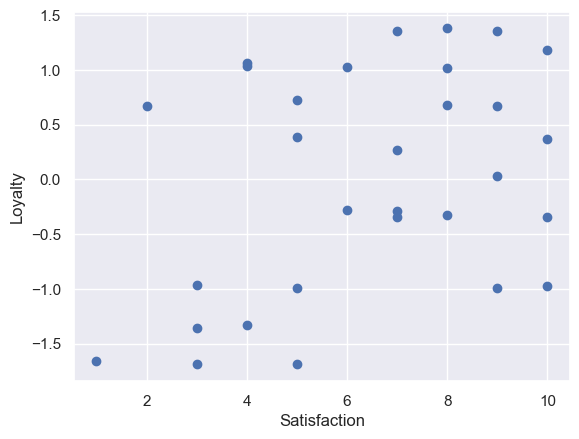

In [6]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [7]:
x = data.copy()
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

Text(0, 0.5, 'Loyalty')

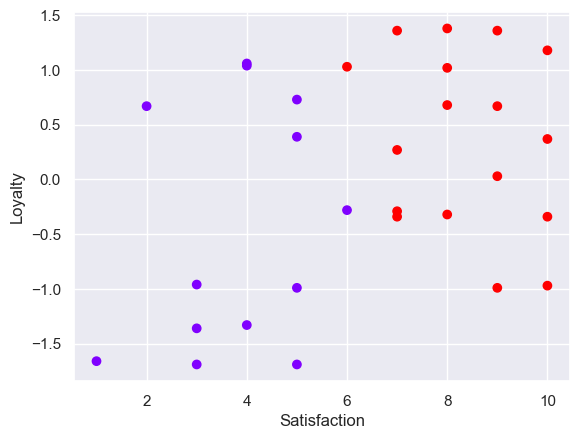

In [9]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

# the model mostly considered satisfaction as a feature because of non standardization

In [11]:
# Standardize
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [13]:
# Elbow method
wcss=[]
all_kmeans={}

for i in range(2,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    all_kmeans[i] = kmeans
    wcss.append(kmeans.inertia_)

wcss

[29.818973034723147,
 17.913349527387968,
 10.247181805928422,
 7.792695153937185,
 6.569489487091783,
 5.326631124753926,
 4.395247193896115,
 3.7576929718931122]

Text(0, 0.5, 'Within-cluster Sum of Squares')

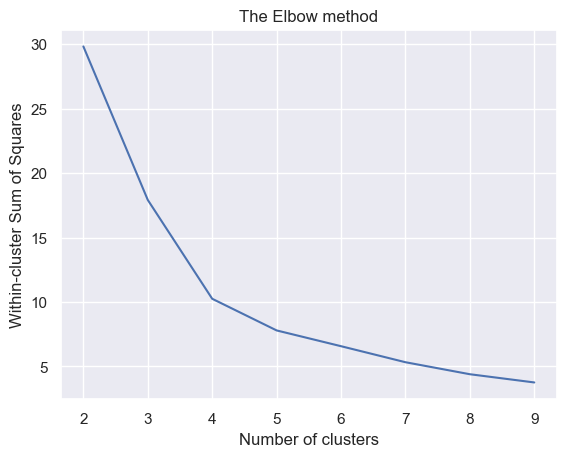

In [28]:
plt.plot(range(2,10), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
# looks like 5 is a good number of clusters

Text(0, 0.5, 'Loyalty')

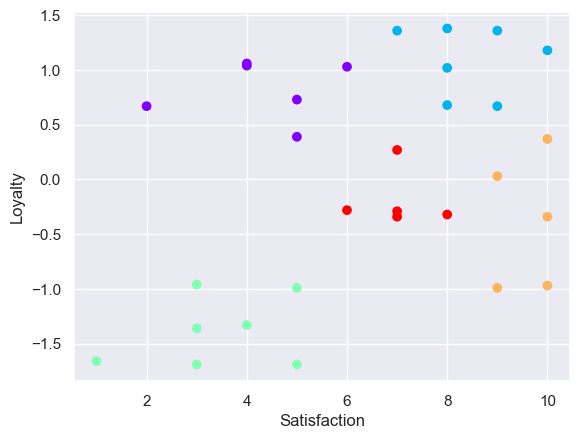

In [40]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

# we plot the data without standardizing the axes but the solution will be the standardized one
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')